# Trabajo Práctico Probabilidad y Estadística B

##### Alumno: Molina, Taiel Alexis.
##### Padrón: 109458.

## Enunciado

En el mercado de smartphones, uno podría pensar que los dispositivos con mayor capacidad de almacenamiento suelen tener baterías más duraderas, dado que suelen ser modelos más premium con mejores especificaciones, incluida la batería. Modelar estos datos podría ayudar a estimar la duración de la batería en función de su capacidad de almacenamiento, algo útil para los consumidores al elegir un nuevo dispositivo. El archivo smart.txt posee valores registrados sobre capacidad de almacenamiento (primera columna en GB) y la respectiva duración de baterías (segunda columna en horas). Utilizando Python o R resolver:

1. Antes de suponer una distribución conocida para cada variable, estimar las varianzas de forma insesgada (y por separado).

2. Asumiendo que la distribución de la capacidad de almacenamiento es normal, se desea hacer un test para rechazar que la media es $μ_{0}^{x}$. Graficar el p-valor en función de $μ_{0}^{x}$. Relacionar dicho gráfico con el concepto de nivel de significación. ¿Qué puede decir del punto donde el p-valor alcanza el máximo?

3. Graficar la función de distribución empírica de la capacidad de almacenamiento y compararla con la curva correspondiente a una normal cuya media corresponda al valor que maximiza el p-valor del inciso 2 y cuya varianza sea la estimada en el inciso 1.

4. Antes de asumir una distribución conocida para la duración de las baterías, se desea hacer un test para rechazar que la media es $μ_{0}^{y}$. Graficar el p-valor asintótico en función de $μ_{0}^{y}$. Relacionar dicho gráfico con el concepto de nivel de significación asintótico. ¿Qué puede decir del punto donde el p-valor asintótico alcanza el máximo?

5. Graficar el histograma de la duración de las baterías y compararla con la curva correspondiente a una normal cuya media corresponda al valor que maximiza el p-valor asintótico del inciso 4 y cuya varianza sea la estimada en el inciso 1.

6. Asumiendo que los datos corresponden a una normal bivariada cuyas medias y varianzas son las utilizadas en los incisos 3 y 5 (asumiendo que son los verdaderos valores y son conocidos), graficar la log-verosimilitud en función de $\rho$. Estimar por máxima verosimilitud el coeficiente de correlación. Recomendamos seguir los siguientes pasos:
- Halle una expresión analítica (a mano) para la log-verosimilitud $(\log(L(\rho)) = \sum_{i=1}^{n} \log f_p(x_i, y_i))$.
- Defina una función que para cada ρ devuelva el valor de $log(L(\rho))$.
- Construir el gráfico pedido. Para evitar errores numéricos suponer $\rho \in [−0.9, 0.9]$.
- Encuentre el $\rho$ que maximiza $log(L(\rho))$ utilizando argmax (numpy).

7. Asumiendo la distribución del inciso 6, utilizando como coeficiente de correlación su estimación, hallar la recta de regresión. Graficar los datos con una nube de puntos y superponer la recta de regresión sobre ellos. Utilice la recta para estimar cuánto duraría la batería de un smartphone de 256GB de almacenamiento. Utilice scatter (matplotlib) para el gráfico.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
from math import sqrt

In [44]:
with open("tp_proba.txt", "r") as file:
    content = file.read()

columns = content.split('\n')

columna_capacidad = "Capacidad almacenamiento (GB)"
columna_bateria = "Bateria (hs)"

df = pd.DataFrame({
    columna_capacidad: columns[0].strip().split(),
    columna_bateria: columns[1].strip().split()
})

In [45]:
df

,Capacidad almacenamiento (GB),Bateria (hs)
0,1.728410482964301593e+02,1.993094365342351892e+01
1,1.810869536598085290e+02,2.939171332124981717e+01
2,8.389491403880364828e+01,2.166707768538169177e+01
3,1.316523438149948220e+02,2.158607242183519048e+01
4,1.252197524182479356e+02,2.445483764217112110e+01
...,...,...
995,1.285115276831897972e+02,2.166467860323509242e+01
996,1.152488624622447730e+02,2.204388649137436573e+01
997,1.237223550506687104e+02,2.020013715152357747e+01
998,8.097534253823346262e+01,2.243922035497707412e+01


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Capacidad almacenamiento (GB)  1000 non-null   object
 1   Bateria (hs)                   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [47]:
df[columna_capacidad] = pd.to_numeric(df[columna_capacidad])
df[columna_bateria] = pd.to_numeric(df[columna_bateria])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Capacidad almacenamiento (GB)  1000 non-null   float64
 1   Bateria (hs)                   1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [49]:
df.head(5)

,Capacidad almacenamiento (GB),Bateria (hs)
0,172.841048,19.930944
1,181.086954,29.391713
2,83.894914,21.667078
3,131.652344,21.586072
4,125.219752,24.454838


### Ejercicio 1

El estimador de varianza $\hat{\sigma}^2$ con media desconocida es $\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^2$ y para volverlo insesgado multiplicamos por $\frac{n}{n-1}$ quedandonos finalmente

$\rightarrow S^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \bar{X})^2$

In [50]:
media_capacidad = df[columna_capacidad].mean()
media_bateria = df[columna_bateria].mean()

In [51]:
def calcular_estimacion_varianza_insesgada(columna, promedio):
    return sum((xi - promedio) ** 2 for xi in df[columna]) / (len(df[columna]) - 1)

In [52]:
estimacion_varianza_capacidad = calcular_estimacion_varianza_insesgada(columna_capacidad, media_capacidad)
estimacion_varianza_bateria = calcular_estimacion_varianza_insesgada(columna_bateria, media_bateria)

In [53]:
print(f"La estimación de la varianza de la capacidad es de {estimacion_varianza_capacidad:.3f} GB.")

La estimación de la varianza de la capacidad es de 1068.244 GB.


In [54]:
print(f"La estimación de la varianza de la batería es de {estimacion_varianza_bateria:.3f} hs.")

La estimación de la varianza de la batería es de 15.566 hs.


### Ejercicio 2

$H_{0}: \mu_{x} = \mu_{x_{0}}\hspace{0.2cm}$ vs $\hspace{0.2cm}H_{1}: \mu_{x} \neq \mu_{x_{0}}$

Con $T = \sqrt{n} \frac{\bar{X} - \mu_{x_{0}}}{S} \sim t_{n-1}$, con $S_{x}^2$ como el estimador insesgado de la varianza de la capacidad de almacenamiento

$\delta(\underline{X}) = \mathbb{1}\{T < t_{n - 1, \frac{\alpha}{2}}\} + \mathbb{1}\{T > t_{n - 1, 1 - \frac{\alpha}{2}}\}$



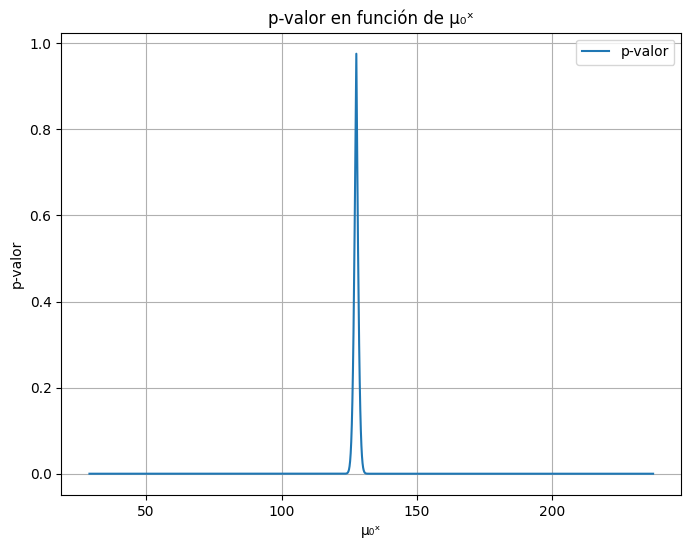

In [55]:
valores_mu_x = np.linspace(df[columna_capacidad].min(), df[columna_capacidad].max(), 1000)

p_valores = []

for mu_x in valores_mu_x:
    _, p_valor = sp.ttest_1samp(df[columna_capacidad], mu_x)
    p_valores.append(p_valor)

plt.figure(figsize=(8, 6))
plt.plot(valores_mu_x, p_valores, label="p-valor")
plt.xlabel("μ₀ˣ")
plt.ylabel("p-valor")
plt.title("p-valor en función de μ₀ˣ")
plt.grid(True)
plt.legend()
plt.show()

La relación con el nivel de significación $\alpha$ es que si el $p-val(\underline{X}) \geq \alpha$ no se rechaza $H_{0}$ (no se rechaza que $\mu_{x} = \mu_{x_{0}}$)

Como el p-valor se define como el mínimo nivel de significación que permite rechazar $H_{0}$ el punto donde $\mu_{x_{0}}$ alcanza el p-valor máximo es es el punto en el que es más *"díficil"* rechazar $H_{0}$, o en otras palabras, el punto en el que es menos probable rechazar $H_{0}$.

### Ejercicio 3

In [56]:
indice_max = np.argmax(p_valores)
max_mu_x = valores_mu_x[indice_max]

In [57]:
max_mu_x

127.61165624956223

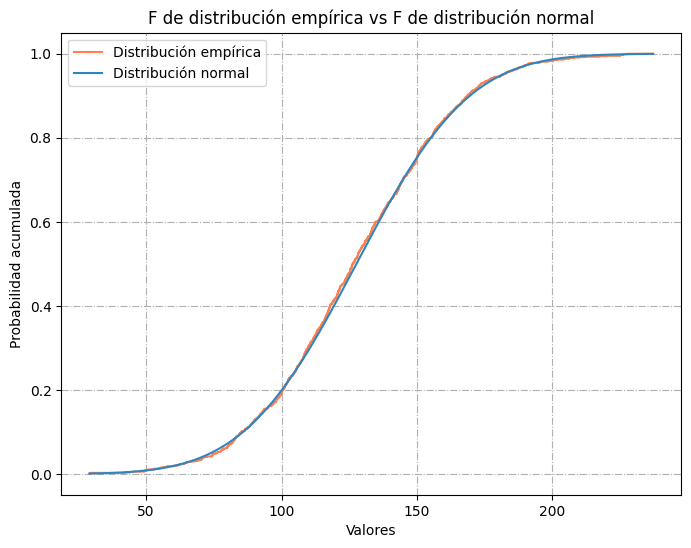

In [58]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x, y = ecdf(df[columna_capacidad])

plt.figure(figsize=(8, 6))
plt.step(x, y, color="#FF7F50", label="Distribución empírica")

mu = max_mu_x
sigma = sqrt(estimacion_varianza_capacidad) 

x_normal = np.linspace(np.min(x), np.max(x), 1000)
normal_cdf = sp.norm.cdf(x_normal, mu, sigma)

plt.plot(x_normal, normal_cdf, color="#2E86C1", label="Distribución normal")

plt.xlabel("Valores")
plt.ylabel("Probabilidad acumulada")
plt.title("F de distribución empírica vs F de distribución normal")
plt.legend()
plt.grid(True, linestyle="-.")
plt.show()

### Ejercicio 4

$H_{0}: \mu_{y} = \mu_{y_{0}}\hspace{0.2cm}$ vs $\hspace{0.2cm}H_{1}: \mu_{y} \neq \mu_{y_{0}}$

Con $T = \sqrt{n} \frac{\bar{X} - \mu_{y_{0}}}{S} \sim t_{n-1}$, con $S_{y}^2$ como el estimador insesgado de la varianza de la batería

$\delta(\underline{X}) = \mathbb{1}\{T < t_{n - 1, \frac{\alpha}{2}}\} + \mathbb{1}\{T > t_{n - 1, 1 - \frac{\alpha}{2}}\}$

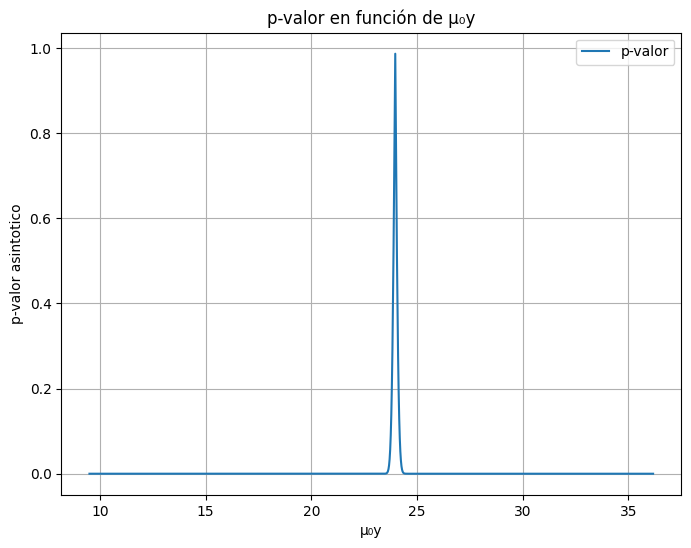

In [59]:
valores_mu_y = np.linspace(df[columna_bateria].min(), df[columna_bateria].max(), 1000)

p_valores_asintoticos = []

for mu_y in valores_mu_y:
    _, p_valor_asintotico = sp.ttest_1samp(df[columna_bateria], mu_y)
    p_valores_asintoticos.append(p_valor_asintotico)

plt.figure(figsize=(8, 6))
plt.plot(valores_mu_y, p_valores_asintoticos, label="p-valor")
plt.xlabel("μ₀y")
plt.ylabel("p-valor asintotico")
plt.title("p-valor en función de μ₀y")
plt.grid(True)
plt.legend()
plt.show()

### Ejercicio 5

In [60]:
indice_max = np.argmax(p_valores_asintoticos)
max_mu_y = valores_mu_y[indice_max]

In [61]:
# VER COLORES

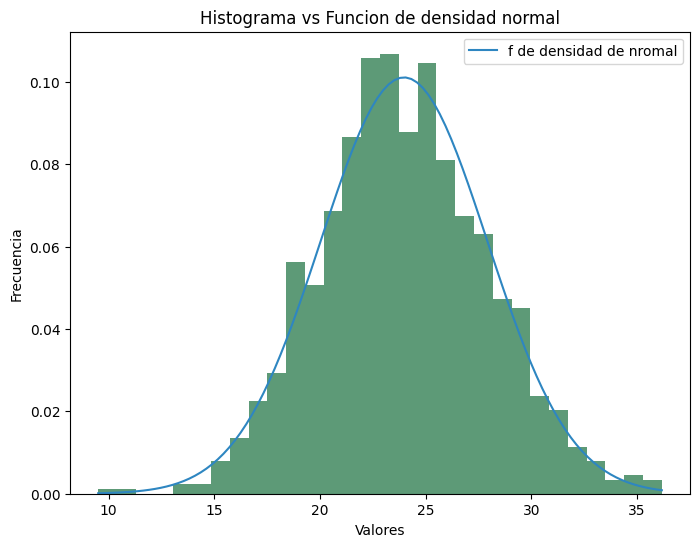

In [62]:
plt.figure(figsize=(8, 6))
plt.hist(df[columna_bateria], density=True, bins=30, alpha=0.7, color="#196F3D")  

mu = max_mu_y # p valor asintotico maximo hallado en 4
sigma = sqrt(estimacion_varianza_bateria) 

y = np.linspace(np.min(df[columna_bateria]), np.max(df[columna_bateria]), 100)
normal_pdf = sp.norm.pdf(y, mu, sigma)

plt.plot(y, normal_pdf, color="#2E86C1", label="f de densidad de nromal")

plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma vs Funcion de densidad normal")
plt.legend()
plt.show()

### Ejercicio 6

### Ejercicio 7